# 1. Visualizing intermediate activations

In [4]:
from keras.models import load_model
model = load_model('../src/models/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
img_path = "../src/images/cat_img.jpg"

from keras_preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


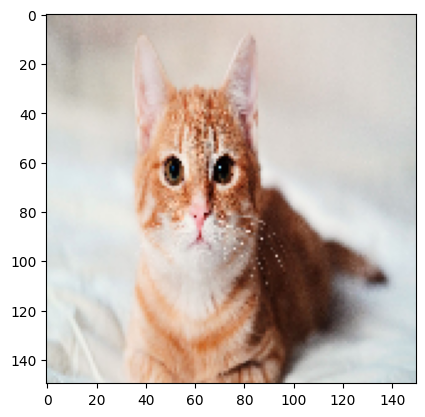

In [6]:
plt.imshow(img_tensor[0])
plt.show()

In [7]:
from keras import models

# extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# create a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [8]:
# return a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 6s 6s/step


In [9]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


### It's a 148 x 148 feature map with 32 channels. Let's try plotting the fourth channel of the activation of the first layer of the original model

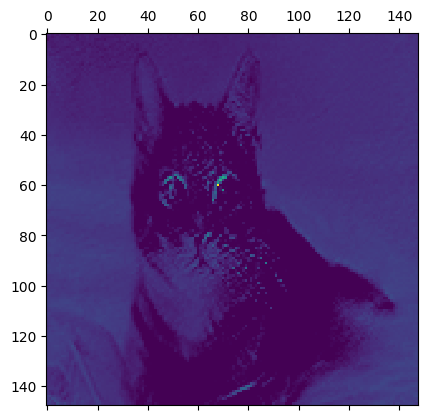

In [12]:
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

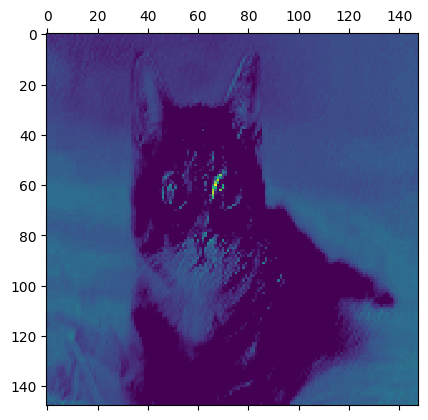

In [13]:
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

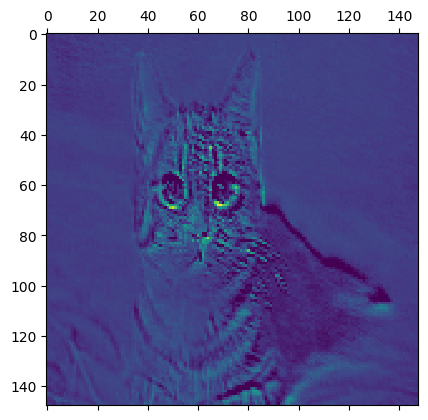

In [14]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

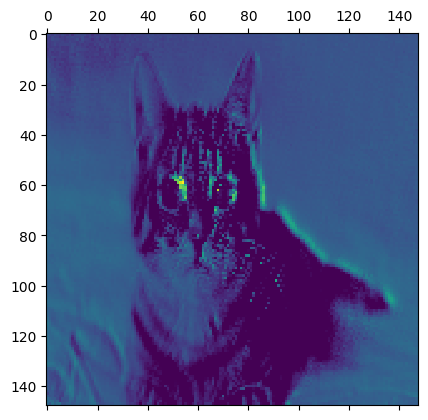

In [15]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')

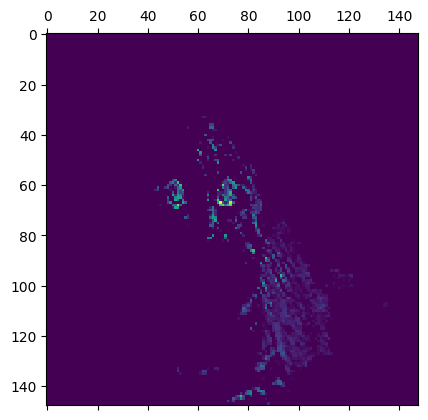

In [16]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

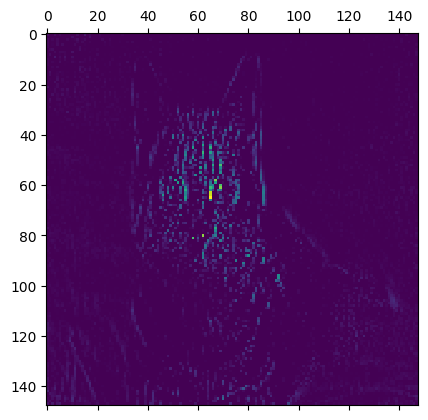

In [17]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

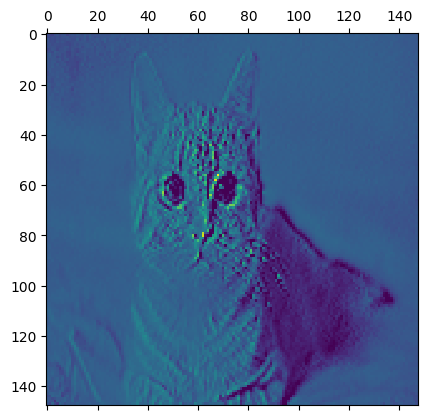

In [18]:
plt.matshow(first_layer_activation[0, :, :, 6], cmap='viridis')

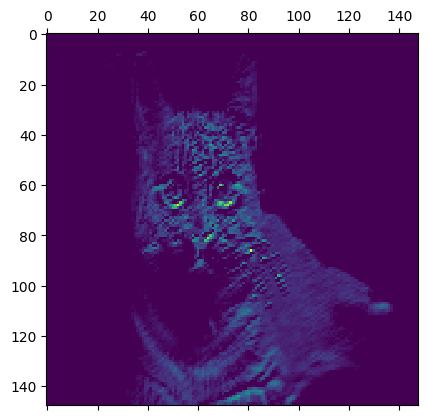

In [19]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

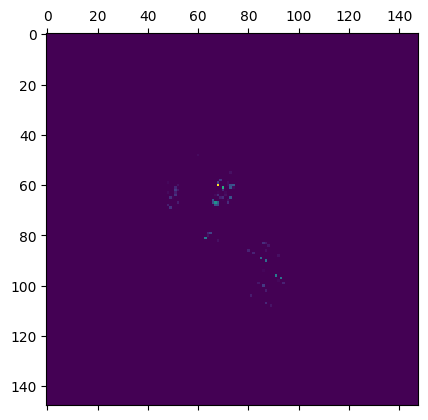

In [20]:
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')

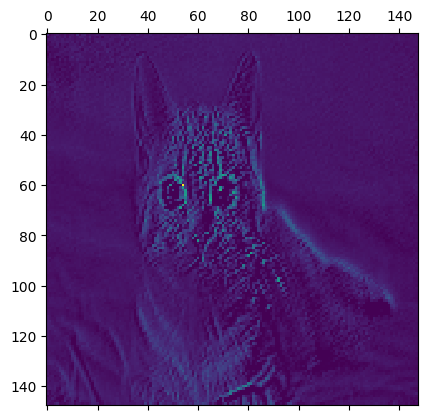

In [21]:
plt.matshow(first_layer_activation[0, :, :, 9], cmap='viridis')

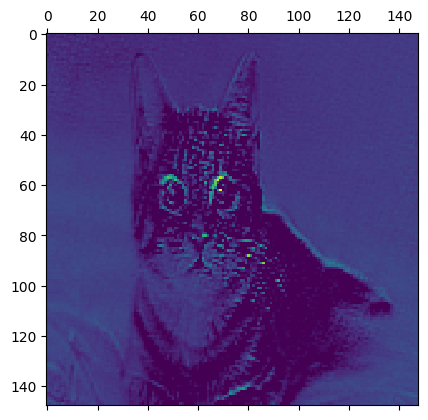

In [22]:
plt.matshow(first_layer_activation[0, :, :, 10], cmap='viridis')

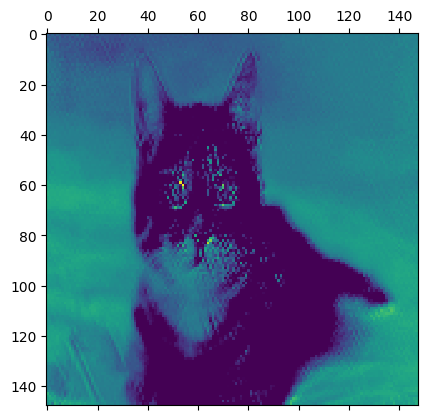

In [23]:
plt.matshow(first_layer_activation[0, :, :, 11], cmap='viridis')

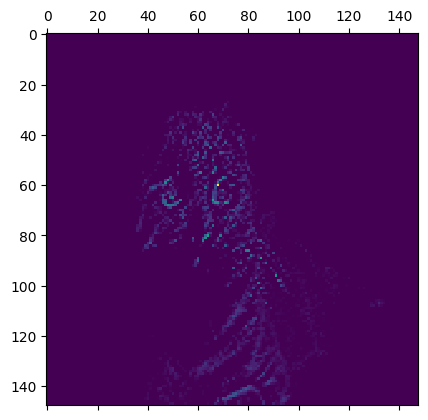

In [24]:
plt.matshow(first_layer_activation[0, :, :, 12], cmap='viridis')

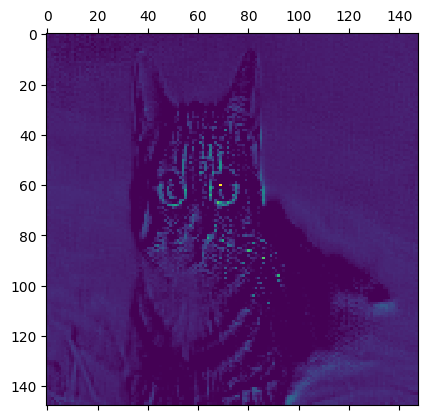

In [25]:
plt.matshow(first_layer_activation[0, :, :, 13], cmap='viridis')

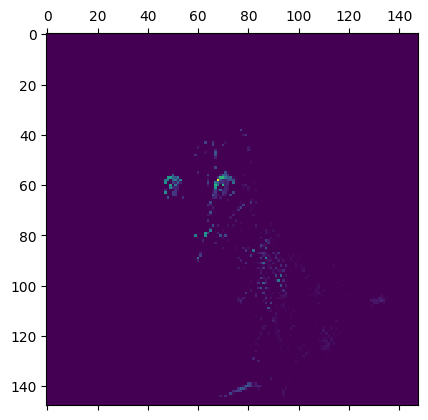

In [26]:
plt.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')

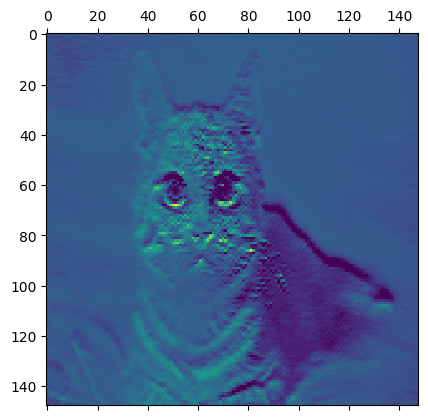

In [27]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

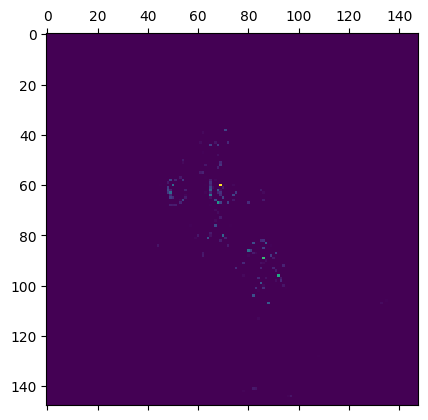

In [28]:
plt.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')

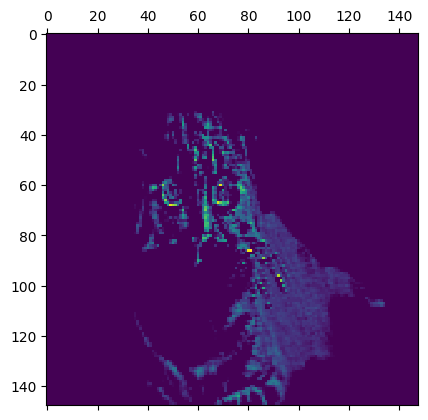

In [29]:
plt.matshow(first_layer_activation[0, :, :, 17], cmap='viridis')

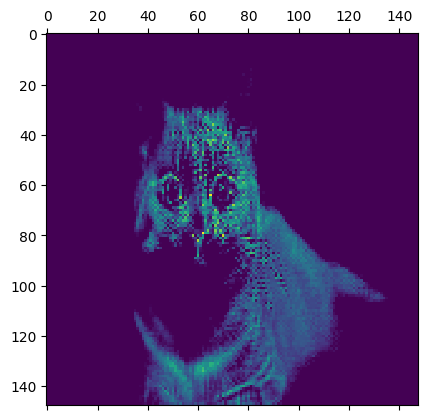

In [30]:
plt.matshow(first_layer_activation[0, :, :, 18], cmap='viridis')

### Visualize every channel in every intermediate activation

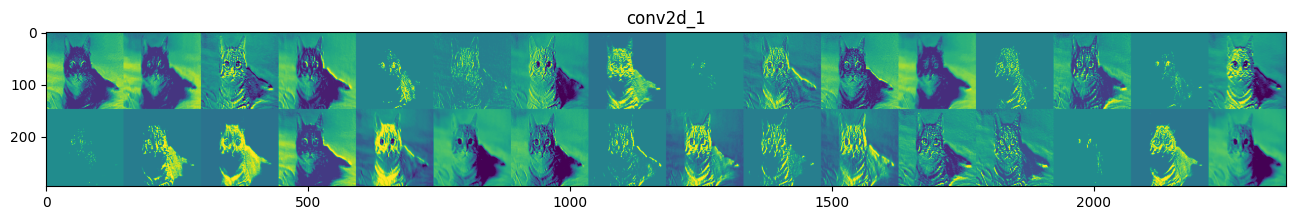

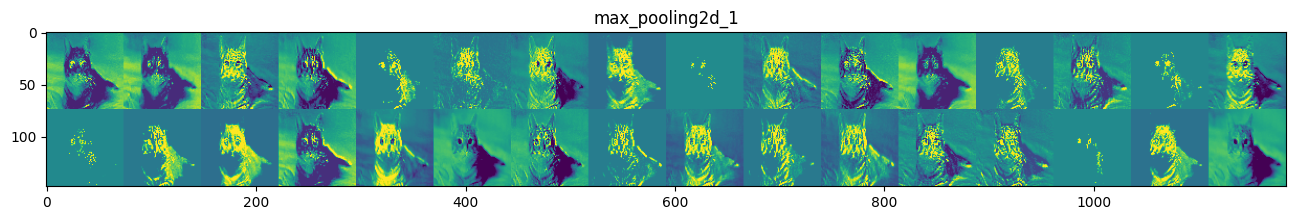

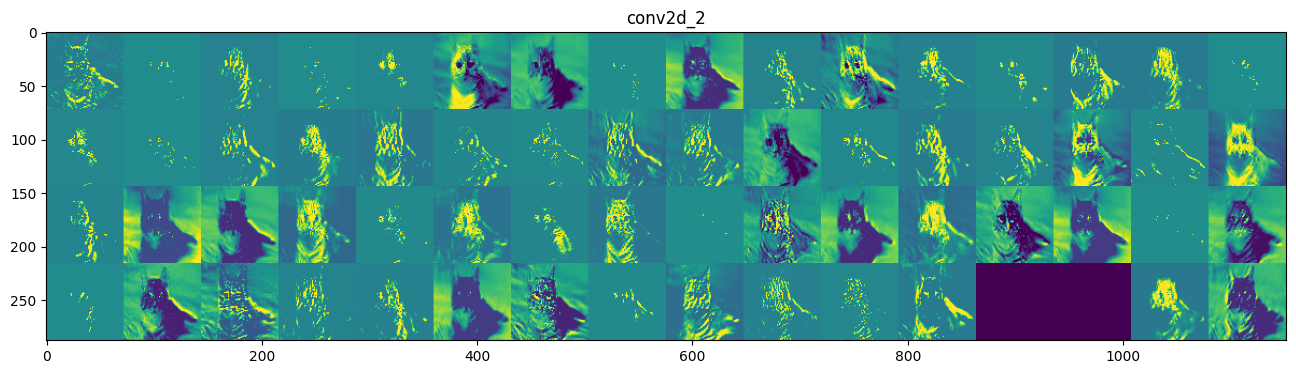

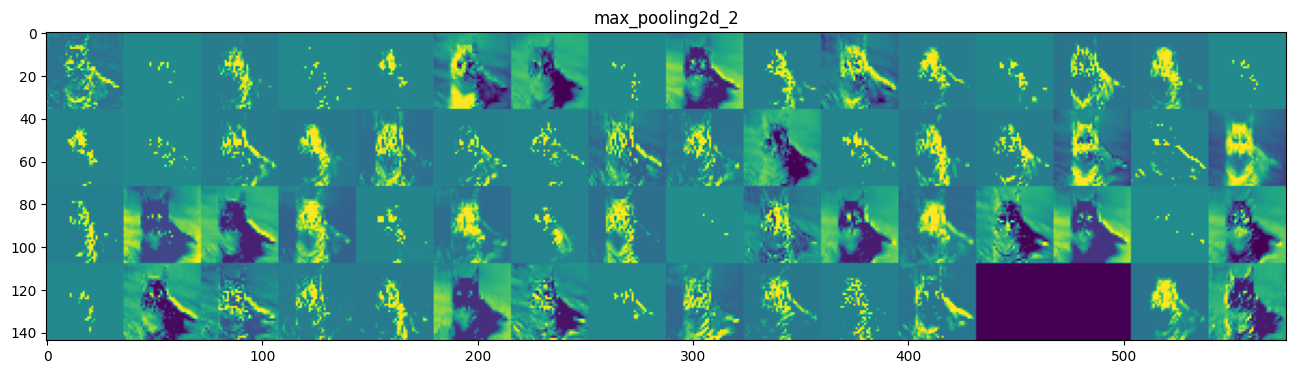

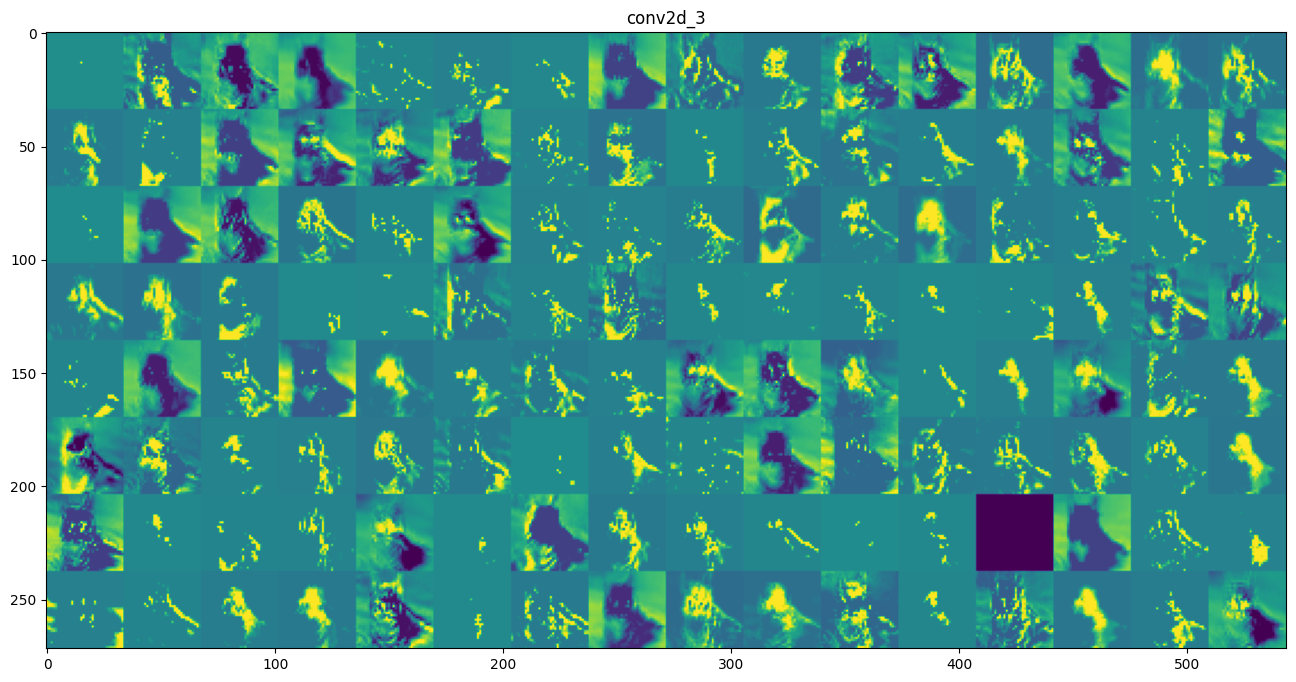

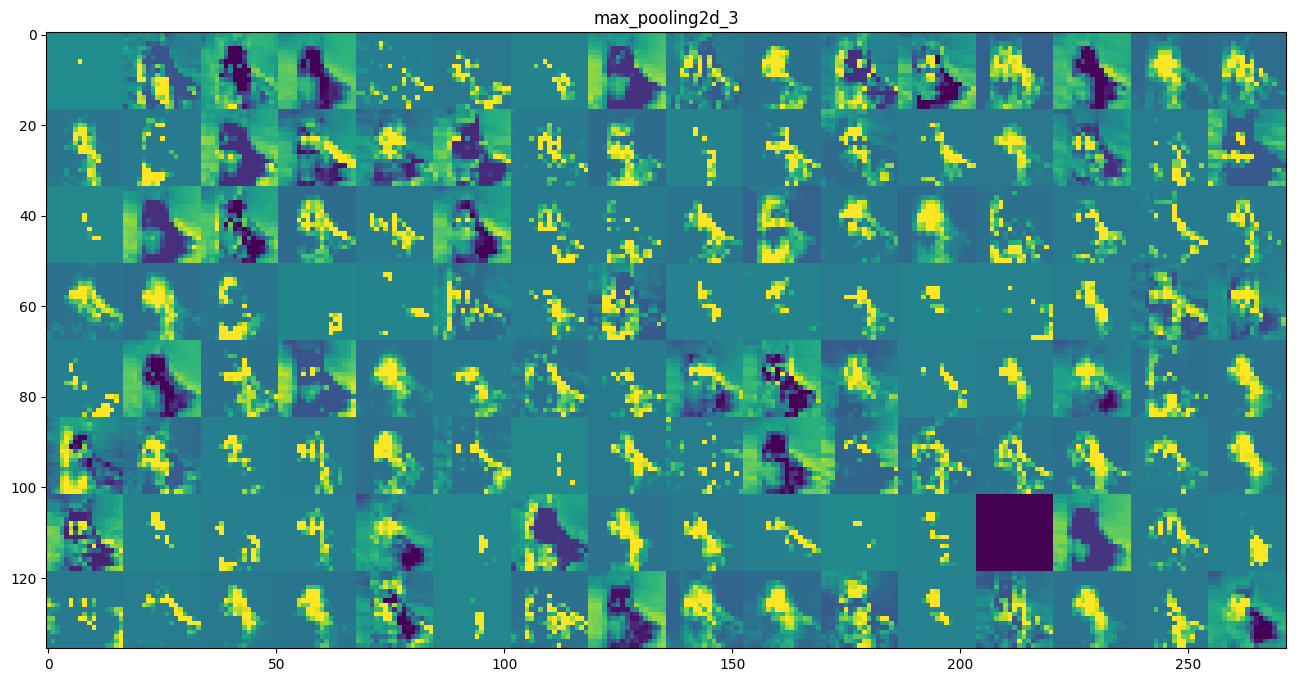

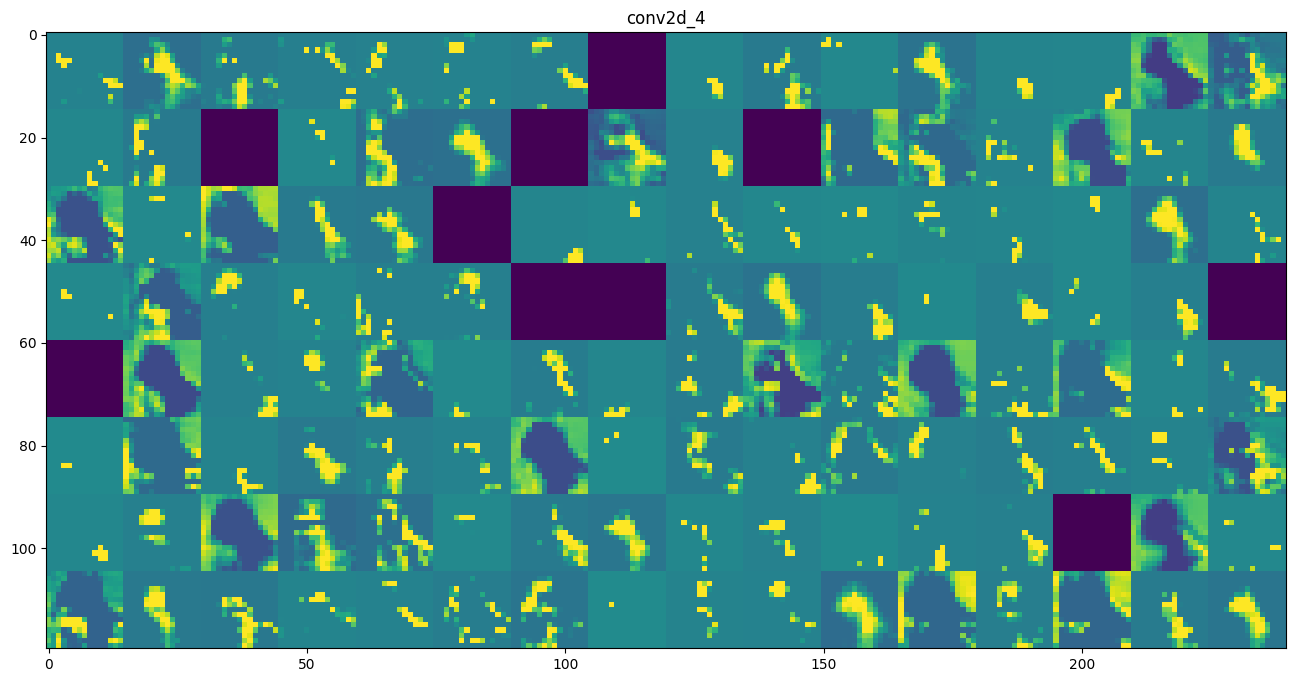

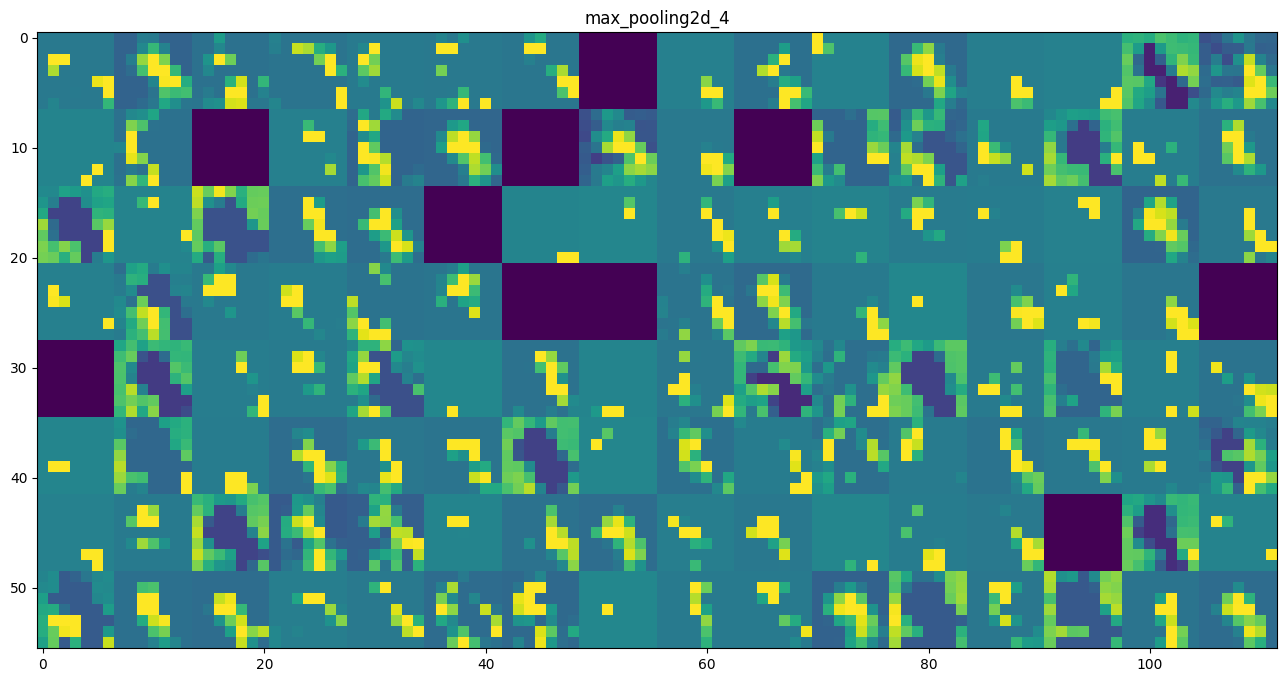

In [32]:
# Names of the layers, so you can have them as part of your plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Display the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # Number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (I, size, size, n_features)
    size = layer_activation.shape[1]

    # Tiles the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # Tiles each filter into a big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]

            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype("uint8")

            # Display the grid
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect="auto", cmap="viridis")